# 1.Importing libraries and loading dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\marig\OneDrive\Área de Trabalho\curso arbeitsamt\data immersion\achievement 6\data sources\final project\Data\Prepared Data'

In [10]:
food_df = pd.read_csv(os.path.join(path, 'food_safety_cdc_3.csv'), index_col = 0)

In [11]:
food_df.shape

(8703, 12)

In [12]:
food_df.head()

,Year,Month,State,Primary Mode,Etiology,Setting,Illnesses,Hospitalizations,Deaths,IFSAC Category,Etiology_id,IFSAC_id
0,2011,1,Ohio,Food,Unknow,Restaurant - Sit-down dining,2,0.0,0.0,Multiple,0,0
1,2011,1,Ohio,Food,Norovirus Genogroup II,Restaurant - Sit-down dining,2,0.0,0.0,Unknow,1,1
2,2011,1,Virginia,Food,Norovirus,Restaurant - Sit-down dining,7,0.0,0.0,Unknow,2,1
3,2011,1,Texas,Food,Unknow,Unknow,2,0.0,0.0,Unknow,0,1
4,2011,1,Colorado,Food,Norovirus unknown,Grocery store,8,1.0,0.0,Fruits,3,2


# 2. Cleaning the dataset

In [13]:
#Droping qualitative columns

food_df_2 = food_df.drop ('Year', axis = 1, inplace = True)

In [14]:
food_df_2 = food_df.drop ('State', axis = 1, inplace = True)

In [15]:
food_df_2 = food_df.drop ('Primary Mode', axis = 1, inplace = True)

In [16]:
food_df_2 = food_df.drop ('Etiology', axis = 1, inplace = True)

In [17]:
food_df_2 = food_df.drop ('Setting', axis = 1, inplace = True)

In [18]:
food_df_2 = food_df.drop ('IFSAC Category', axis = 1, inplace = True)

In [19]:
food_df_2 = food_df.drop ('Etiology_id', axis = 1, inplace = True)

In [20]:
food_df_2 = food_df.drop ('IFSAC_id', axis = 1, inplace = True)

In [23]:
food_df_2 = food_df.drop ('Month', axis = 1, inplace = True)

In [24]:
food_df.head()

,Illnesses,Hospitalizations,Deaths
0,2,0.0,0.0
1,2,0.0,0.0
2,7,0.0,0.0
3,2,0.0,0.0
4,8,1.0,0.0


# 3. Elbow technique

In [25]:
num_cl = range(1, 10) # Range of potencial clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [28]:
score = [kmeans[i].fit(food_df).score(food_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\marig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marig\anaconda3\Lib\site-packages\sklearn\clust

[-13835543.974491546,
 -6632392.668886958,
 -3630443.5983707244,
 -2195746.2937371586,
 -1525657.2946623669,
 -1154518.9379309334,
 -853422.4460115435,
 -677626.2934780172,
 -571659.8140278169]

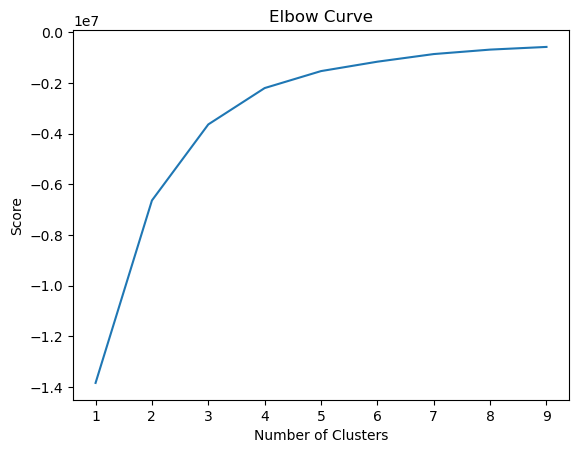

In [29]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

As the curve straights out after the number 3 on the x Axis, I'm going to use the total number of 3 clusters.

# 4. Kmean Clustering

In [30]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [31]:
# Fit the k-means object to the data.

kmeans.fit(food_df)

C:\Users\marig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [32]:
# Defining a column to see the clusters

food_df['clusters'] = kmeans.fit_predict(food_df)

C:\Users\marig\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
food_df.head()

,Illnesses,Hospitalizations,Deaths,clusters
0,2,0.0,0.0,0
1,2,0.0,0.0,0
2,7,0.0,0.0,0
3,2,0.0,0.0,0
4,8,1.0,0.0,0


In [35]:
food_df ['clusters'].value_counts()

0    8420
2     270
1      13
Name: clusters, dtype: int64

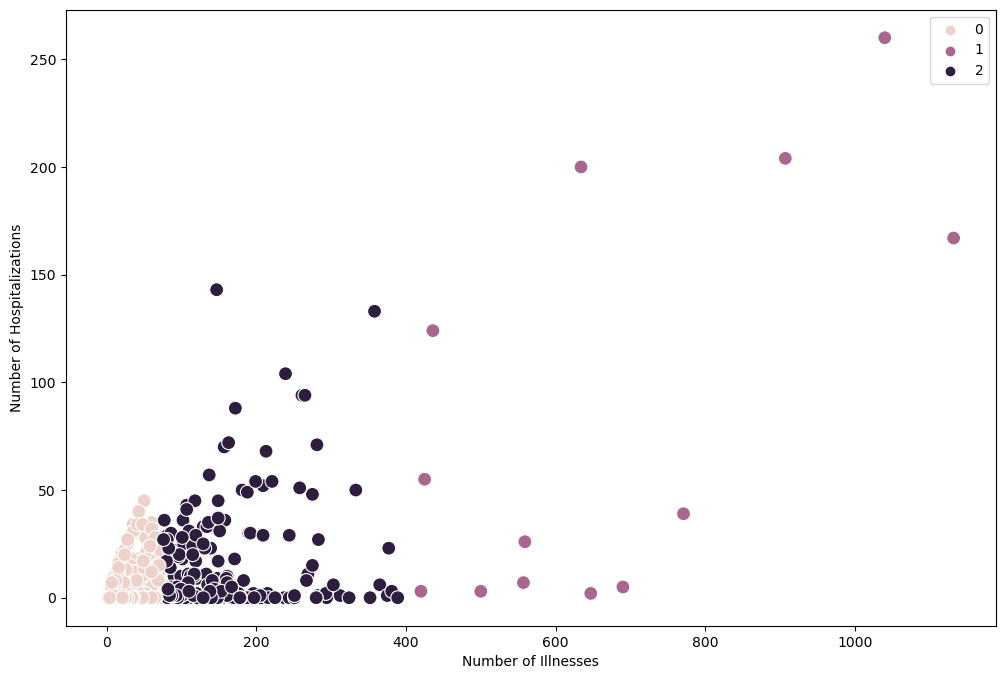

In [36]:
# Plotting the clusters for Illnesses and Hospitalizations

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=food_df['Illnesses'], y=food_df['Hospitalizations'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Number of Illnesses') # Label x-axis.d 

plt.ylabel('Number of Hospitalizations') # Label y-axis.
plt.show()

The clusters 0 and 2 concentrates the biggest part of the points showing that when an outbreak has a low number of sick/infected people, the number of hospitalized people will be the lowest. At the same time, the highest number of hospitalizade people ocurred in an outbreak with a high numeber of illnesses. This is something that is already expected.

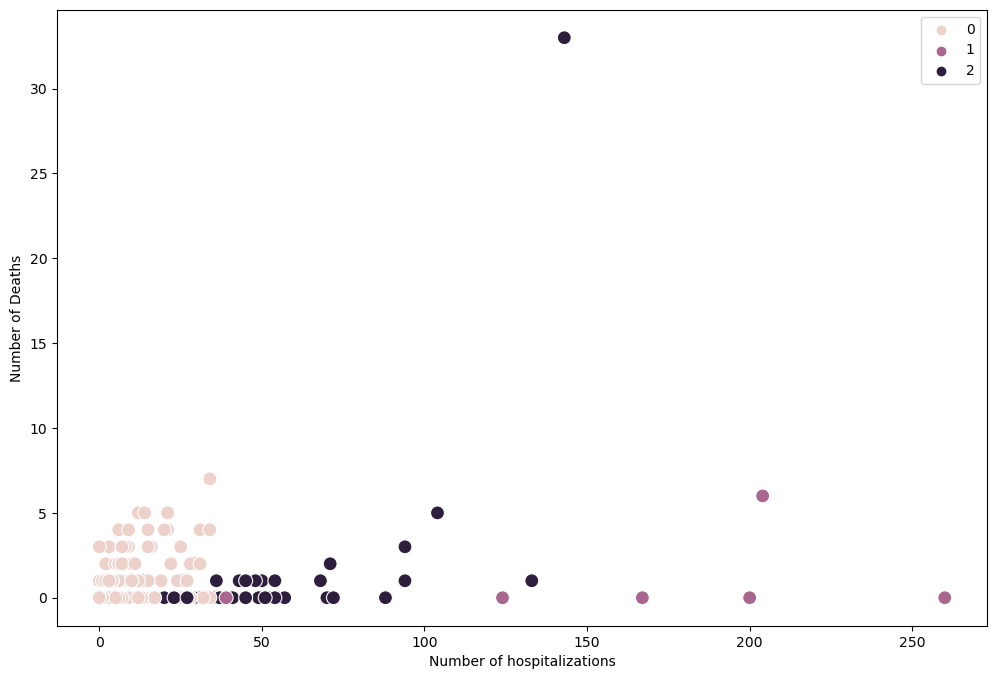

In [37]:
# Plotting the clusters for Hospitalizations and Deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=food_df['Hospitalizations'], y=food_df['Deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Number of hospitalizations') # Label x-axis.d 

plt.ylabel('Number of Deaths') # Label y-axis.
plt.show()

In the case of hospitalizations x deaths, it is also possible to see that the highest number of deaths happened on the outbreaks with a high number of hospitalizations. But here, one outbreak had a high number of deaths, but this was not the outbreak with the highest number of hospitalizations. It should be interesting to know which pathogen was responsible for.

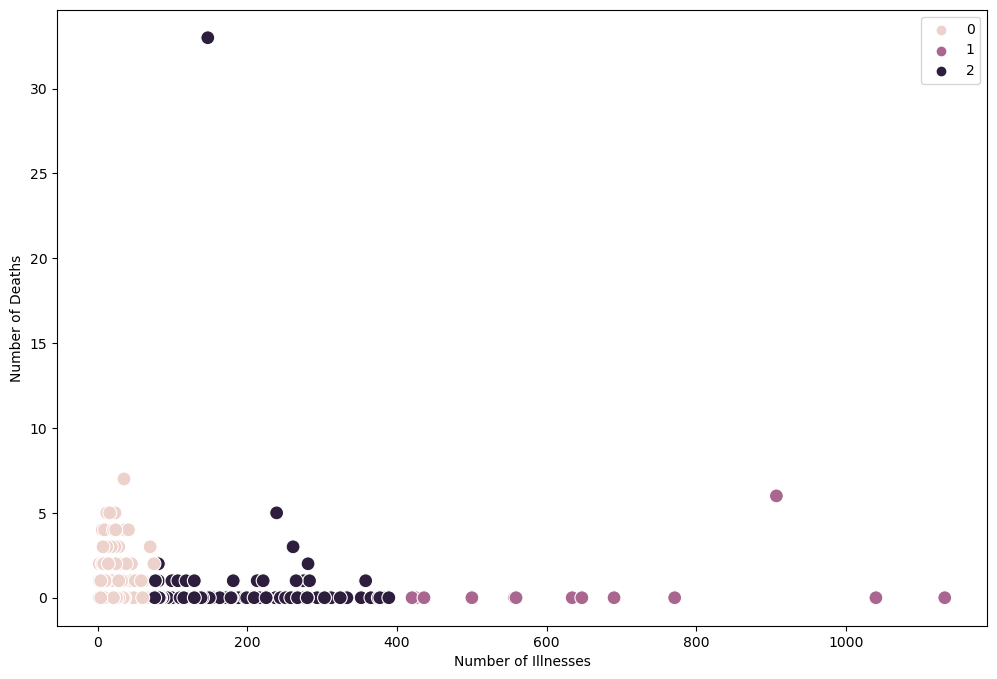

In [38]:
# Plotting the clusters for Illnesses and Deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=food_df['Illnesses'], y=food_df['Deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Number of Illnesses') # Label x-axis.d 

plt.ylabel('Number of Deaths') # Label y-axis.
plt.show()

In the correlation between the number of patients and deaths, we do not see the same pattern as in previous correlations, as the outbreaks with the largest number of patients were not the ones that led to the largest number of deaths.

# 5. Calculating descriptive statistics

In [40]:
food_df.loc[food_df['clusters'] == 2, 'cluster'] = 'dark purple'
food_df.loc[food_df['clusters'] == 1, 'cluster'] = 'purple'
food_df.loc[food_df['clusters'] == 0, 'cluster'] = 'pink'

In [42]:
food_df.groupby('cluster').agg({'Illnesses':['mean', 'median'], 
                         'Hospitalizations':['mean', 'median'], 
                         'Deaths':['mean', 'median']})

Illnesses        Hospitalizations           Deaths       
                   mean median             mean median      mean median
cluster                                                                
dark purple  143.300000  117.0        11.174074    1.0  0.218519    0.0
pink          11.805344    7.0         0.786936    0.0  0.026603    0.0
purple       670.615385  634.0        84.230769   39.0  0.461538    0.0

The descriptive statistics shows that there is a pattern. If an outbreak had a huge number o illnesses, then, it will have more hospitalizations and deaths (purple cluster). This correlation is easier to see with this model as with the regression model from before.
One interesting point to note is that there was an outbreak with fewer patients (agents with a lower transmission rate) but with a very high number of deaths. This was an outlier but it would be interesting to find which agent was responsible for. 
Another interesting option is also the creation of a transmission rate column and another for mortality per outbreak to show in a clear way which pathogens were more or less dangerous or more/less infectious.